In [1]:
import sys
sys.path.append('/home/jyangqi/cylinterp/')
import cylinterp
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt
plt.style.use('default')

*** Detector definition message ***
You are currently using the default XENON10 template detector.


Something unknown went wrong: are you in a noble element?? EF = 0 V/cm. T = 177.15 Kelvin

Something unknown went wrong: are you in a noble element?? EF = 0 V/cm. T = 177.15 Kelvin


# Geometry class

The geometry class is useful for building a cylindrical grid and exporting it to COMSOL

In [2]:
ra, rc = 5e-4, 4 #Inner and outer radius in cm
#Set the min z, max z, number of radii, number of z, number in the first ring
z0, z1, nr, nz, n_first_ring = -1, 11, 60, 100, 8

geometry = cylinterp.Geometry.UniformCylindricalGrid(ra, rc, z0, z1, nr, nz, n_first_ring)

In [3]:
fixed_rand_coords = np.array([[0.91738,1.96182,1.48023],
    [4.73132,1.34186,1.42465],
    [9.67598,1.71061,3.84124],
    [4.60419,2.2572,2.93833],
    [3.42724,1.89636,3.41235],
    [4.64924,1.75566,2.1089],
    [8.66973,1.8854,2.83619],
    [3.70464,0.830971,1.4201],
    [5.48373,1.55557,3.87441],
    [0.147654,0.303774,3.44808],
    [1.37607,1.54288,3.43999],
    [8.16804,1.70794,0.614368],
    [6.86776,1.57014,3.55508],
    [4.58794,1.31836,0.00244411],
    [7.02584,1.85233,1.68586],
    [6.50964,2.31881,3.0541],
    [-0.568133,0.516047,1.70015],
    [10.4431,2.0342,1.03111],
    [2.6066,0.773119,3.13455],
    [1.62602,2.02589,0.702002],
    [1.34281,0.567153,4.00771],
    [6.11748,0.506676,2.29367],
    [8.37495,2.33224,1.68078],
    [0.569711,2.23358,0.911663],
    [10.0738,2.42018,1.83573],
    [6.79702,1.61558,0.813459],
    [7.28601,1.22748,2.93556],
    [0.541302,2.2572,2.35181],
    [6.45421,1.96408,5.84607],
    [3.81909,1.86442,3.0078],
    [9.02254,1.02257,2.08277],
    [7.68493,2.36589,3.22923],
    [3.98321,1.91034,1.65569],
    [7.95458,1.66197,5.27991],
    [8.37182,2.26756,3.27332],
    [-0.183441,1.78167,5.20063],
    [4.29273,0.455087,5.42704],
    [7.35216,1.61583,4.03161],
    [1.86336,2.04108,0.611553],
    [6.21618,1.72,4.36145],
    [9.41344,1.21072,2.37982],
    [0.44772,1.16608,3.78846],
    [0.307001,1.92489,4.46445],
    [10.3757,1.43508,1.438],
    [3.69252,1.66611,1.28029],
    [0.247658,0.379611,5.19705],
    [6.37379,2.38721,3.02738],
    [3.34126,1.30414,1.84264],
    [5.4515,1.55237,1.30855],
    [5.43054,2.4259,5.90639],
    [1.84525,1.05208,3.24216],
    [4.02466,1.87538,4.16545],
    [0.241712,1.80176,4.65268],
    [8.51467,2.23657,5.04718],
    [2.136,1.48767,0.576337],
    [3.77137,2.0877,3.32904],
    [1.22555,2.26071,4.35569],
    [3.43676,1.93393,1.89517],
    [7.62383,1.1309,0.612481],
    [1.10662,2.47674,4.19127],
    [9.39617,1.25062,6.27891],
    [9.07329,1.25975,0.175064],
    [10.6264,1.21311,2.09354],
    [-0.54946,2.26438,4.20871],
    [0.385467,0.232229,1.29286],
    [1.41057,1.18742,4.68084],
    [-0.744761,2.21812,0.0061976],
    [10.9738,0.964124,2.31921],
    [1.30796,0.994178,1.6718],
    [9.18013,1.55393,1.32054],
    [4.20236,1.73994,2.78742],
    [1.06572,0.192482,1.42858],
    [3.94253,1.29344,4.1197],
    [6.10133,1.90587,2.90578],
    [1.47779,1.25761,1.12234],
    [0.992317,2.37758,0.425441],
    [-0.439995,1.5531,5.98091],
    [9.85029,2.23534,0.400166],
    [0.803315,0.920057,0.480759],
    [-0.000144681,2.01357,0.656627],
    [3.97599,1.05916,1.22822],
    [8.93875,2.15883,3.98676],
    [8.90582,0.787646,5.77091],
    [0.299833,0.927657,1.36629],
    [6.50496,2.02011,4.24571],
    [4.47529,1.76245,1.13156],
    [6.80437,2.2365,1.02469],
    [5.96441,2.02272,2.31146],
    [7.79264,1.3089,0.330132],
    [3.88085,2.00258,5.07904],
    [7.83826,0.761,2.26563],
    [9.71582,1.97275,2.77507],
    [6.8991,0.0938258,6.25366],
    [8.01934,1.53503,1.86274],
    [9.52879,2.14658,4.22747],
    [1.47811,1.52122,2.88096],
    [8.01448,1.48852,3.51634],
    [0.889599,1.49401,3.06632],
    [-0.0288105,2.29321,1.52589],
    [3.3734,0.984517,4.55499]])

cpp_tetra_ind = np.array([[445506,445507,445960,418056],
    [1293115,1293116,1293427,1320567],
    [2420864,2420865,2420469,2448316],
    [1271582,1271583,1271063,1299034],
    [1021673,1021674,1022116,994223],
    [1295262,1295263,1295670,1267812],
    [2202026,2202027,2202468,2174576],
    [1071770,1071771,1071586,1044320],
    [1458940,1458941,1459306,1486392],
    [247224,247225,247161,274676],
    [553033,553034,553397,525582],
    [2091246,2091247,2090859,2063795],
    [1788698,1788699,1788335,1761248],
    [1265595,1265596,1265303,1293046],
    [1817633,1817634,1817211,1845084],
    [1711344,1711345,1710809,1683893],
    [110223,110224,110346,82773],
    [2587571,2587572,2587104,2615023],
    [824576,824577,824403,797125],
    [610607,610608,611075,583157],
    [522160,522161,522032,549611],
    [1620040,1620041,1619932,1592589],
    [2122990,2122991,2122458,2150442],
    [365014,365015,365530,337563],
    [2507866,2507867,2508431,2535318],
    [1761086,1761087,1761459,1788537],
    [1869361,1869362,1869078,1896812],
    [365650,365651,365132,338200],
    [1681113,1681114,1681578,1708565],
    [1103998,1103999,1103573,1076548],
    [2280290,2280291,2280056,2252839],
    [1985869,1985870,1986422,1958419],
    [1131794,1131795,1131356,1159245],
    [2036243,2036244,2036643,2008792],
    [2122592,2122593,2122071,2150043],
    [197835,197836,197421,170385],
    [1208217,1208218,1208334,1180767],
    [1898531,1898532,1898912,1871080],
    [665969,665970,665503,638519],
    [1652270,1652271,1651873,1624819],
    [2363171,2363172,2363454,2335721],
    [331859,331860,331590,304408],
    [308465,308466,308020,281014],
    [2583951,2583952,2583625,2556501],
    [1075212,1075213,1075602,1047762],
    [274779,274780,274880,302231],
    [1684442,1684443,1683891,1656992],
    [991175,991176,990879,963724],
    [1458795,1458796,1459154,1486247],
    [1465091,1465092,1465666,1492542],
    [633275,633276,633528,660726],
    [1131529,1131530,1131974,1158981],
    [280152,280153,280582,307604],
    [2149667,2149668,2150192,2177118],
    [717237,717238,717578,689786],
    [1077942,1077943,1078432,1105394],
    [503074,503075,502551,530525],
    [1022007,1022008,1022461,994556],
    [1951067,1951068,1951329,1978518],
    [477273,477274,477859,504724],
    [2363634,2363343,2363067,2335892],
    [2280998,2280999,2281291,2308449],
    [2637668,2637669,2637950,2610218],
    [118747,118748,118225,91297],
    [302044,302045,302001,329495],
    [551506,551507,551795,524056],
    [62979,62980,63493,90431],
    [2719280,2719281,2719062,2691830],
    [523176,523177,523410,550628],
    [2309777,2309778,2310136,2282327],
    [1185502,1185503,1185911,1158051],
    [466708,466709,466752,494159],
    [1128541,1128542,1128239,1101091],
    [1626001,1626002,1625561,1598551],
    [551629,551630,551924,579080],
    [448915,448916,448371,476367],
    [141411,141412,141782,113961],
    [2478699,2478700,2479214,2451249],
    [413115,413116,413330,385664],
    [226290,226291,226757,253742],
    [1127314,1127315,1127563,1154766],
    [2258877,2258878,2259385,2231426],
    [2252104,2252105,2252300,2224653],
    [303341,303342,303558,275890],
    [1708910,1708911,1709386,1681459],
    [1240298,1240299,1240703,1267749],
    [1765024,1765025,1765540,1792476],
    [1571512,1571513,1571983,1598963],
    [2006788,2006789,2006495,1979337],
    [1105049,1105050,1105528,1132501],
    [2004944,2004945,2004773,1977493],
    [2422527,2422528,2422071,2449978],
    [1784346,1784323,1784315,1811774],
    [2035298,2035299,2035658,2062749],
    [2396151,2396152,2396659,2368700],
    [553001,553002,552655,580453],
    [2035043,2035044,2035392,2062495],
    [443208,443209,442861,415757],
    [228326,228327,228858,255777],
    [989949,989950,990190,1017400]])

cpp_interp_fields = np.array([[31.3082,425.677,72.0606],
[68.6563,478.521,-2.66763],
[-437.162,-365.711,-145.702],
[-245.595,73.0652,-17.4391],
[-354.038,-86.2359,4.90899],
[-183.045,314.723,-3.72066],
[-400.663,112.816,-68.2663],
[110.07,774.353,8.79948],
[-308.547,-272.089,-2.27074],
[-1896.18,-594.25,458.982],
[-460.06,-136.639,81.7155],
[339.996,229.792,-46.7786],
[-400.383,-157.842,-14.0455],
[489.31,-0.465537,1.42634],
[-39.0448,373.094,-12.6507],
[-318.14,-3.60748,-0.540052],
[-225.482,1710.25,1206.62],
[391.139,641.767,-251.285],
[-846.99,-1.89485,34.9125],
[272.898,218.618,39.0799],
[-745.876,-875.166,120.263],
[-850.019,949.767,-7.81013],
[9.20575,317.639,-58.9373],
[243.428,378.384,22.1714],
[-167.724,663.157,47.0564],
[274.682,293.097,-12.5483],
[-539.79,107.32,-27.1474],
[-247.707,249.98,8.54284],
[312.076,-126.124,-4.04949],
[-368.251,41.3353,-1.67806],
[-339.059,601.961,-152.099],
[-333.073,3.28852,-10.2743],
[-26.1121,363.319,-6.37233],
[216.171,-352.935,-40.1088],
[-359.778,-24.0478,-70.0754],
[324.266,-613.286,231.132],
[926.641,-1082.37,1.10919],
[-260.008,-318.256,-23.661],
[288.744,197.93,32.6649],
[-125.488,-362.448,-5.69267],
[-473.481,445.591,-197.249],
[-548.408,-416.386,233.917],
[-130.76,-520.539,104.593],
[108.645,811.959,-375.79],
[102.781,392.023,2.54889],
[765.08,-1446.02,403.404],
[-299.44,4.90466,1.12224],
[-131.733,488.989,10.246],
[103.067,407.317,-0.164859],
[172.151,120.312,19.0112],
[-636.884,-61.6045,69.6835],
[-165.708,-312.049,-6.40182],
[-34.2727,-575.082,143.341],
[81.9257,-390.172,-44.1492],
[378.582,246.799,41.1063],
[-330.373,-53.8736,-2.5103],
[-63.0746,-378.674,63.7718],
[-96.6497,344.615,5.04103],
[477.825,333.133,-37.5561],
[-112.678,-107.635,45.5236],
[633.62,-1.3757,-186.267],
[594.574,106.004,-137.146],
[-508.831,877.113,-517.228],
[-401.676,-671.623,267.265],
[708.606,2517.48,321.548],
[-22.3909,-595.733,98.5869],
[886.749,-1.30973,417.594],
[-1030.54,1107.8,-704.271],
[-67.3867,684.883,112.649],
[125.632,505.892,-117.144],
[-360.367,119.415,-3.47542],
[511.258,3244.47,139.611],
[-271.385,-426.258,0.851508],
[-360.567,71.6715,4.55999],
[237.079,504.468,84.9708],
[243.415,23.0933,22.8575],
[768.065,-238.595,357.363],
[493.513,181.929,-0.0339785],
[674.491,352.314,185.953],
[489.405,375.889,110.099],
[200.445,583.008,4.81046],
[-208.806,-285.802,-40.9222],
[726.228,-427.619,-147.989],
[167.457,800.934,315.252],
[-131.467,-288.336,-6.06174],
[143.597,340.529,-4.94672],
[165.723,220.662,-6.51104],
[-200.921,226.085,0.58989],
[491.381,163.575,-42.924],
[91.7263,-342.925,-9.49364],
[-551.986,653.587,-54.013],
[-500.198,186.075,-86.8819],
[7726.73,-191.417,-21.9882],
[-126.215,438.669,-47.4356],
[-202.688,-377.98,-32.2624],
[-466.07,116.255,76.3745],
[-444.784,-161.737,-50.1817],
[-528.107,37.3363,121.703],
[5.75684,626.238,11.2142],
[-104.755,-670.53,9.06924]])

Text(0, 0.5, 'y [cm]')

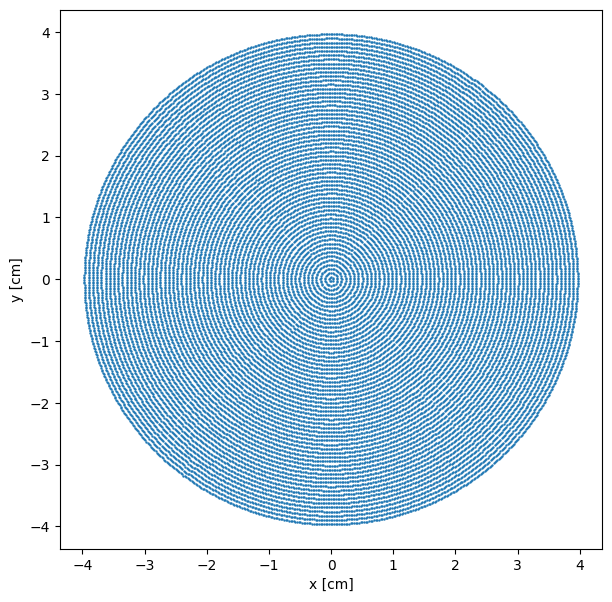

In [4]:
plt.figure(figsize = (7,7))
plt.scatter(geometry.r_coords*np.cos(geometry.theta_coords),
            geometry.r_coords*np.sin(geometry.theta_coords),
            s = 0.5)
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')

We can also export this grid to a csv file that can be fed into COMSOL

In [5]:
geometry.ComsolGrid()

,x,y,z
0,3.439407e-02,0.000000e+00,-1.0
1,2.432028e-02,2.432028e-02,-1.0
2,2.106029e-18,3.439407e-02,-1.0
3,-2.432028e-02,2.432028e-02,-1.0
4,-3.439407e-02,4.212059e-18,-1.0
...,...,...,...
2745095,3.963809e+00,-1.349673e-01,11.0
2745096,3.964636e+00,-1.079814e-01,11.0
2745097,3.965279e+00,-8.099040e-02,11.0
2745098,3.965738e+00,-5.399569e-02,11.0


In [6]:
# geometry.ExportGrid('test_data/ExampleComsolGrid.csv')

# Physics Module

The Physics module has two classes: Physics and RTPC (though you can add more)

## The Field Class

The Field class loads in the field using the coordinates generated by the UniformCylindricalGrid class. This class MUST have a consistent coordinate system with the corresponding UniformCylindricalGrid class. This puts the field map in a dataframe with all 3 components. This also provides an interpolation function for the field.

In [5]:
sag = 1
field = cylinterp.Physics.Field(ra, rc, z0, z1, nr, nz, n_first_ring, f'test_data/4500V_1mmSag_Run29.txt',)

In [6]:
n_pts = 10000
th0 = np.pi/4
r_edge = 2.5
r_values = np.linspace(geometry.unique_r_coords[0], r_edge, n_pts) #cm
theta_values = np.repeat(th0, n_pts) #radians
z_values = np.repeat(5., n_pts) #cm

pts = np.array([z_values, r_values, theta_values]).T

Text(0, 0.5, 'E [V/cm]')

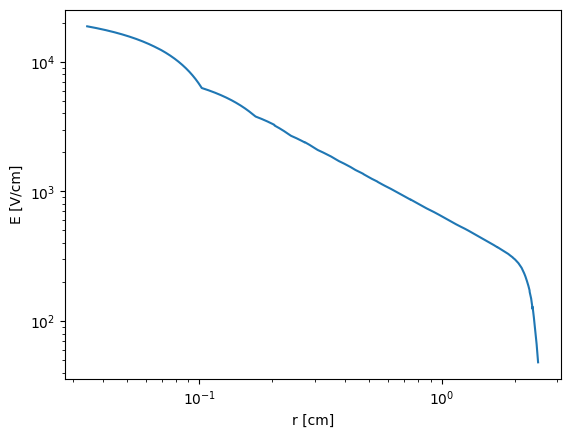

In [7]:
plt.plot(r_values, np.linalg.norm(field.Interpolate(pts), axis = 1))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('r [cm]')
plt.ylabel('E [V/cm]')

#The bumps are an artifact of using a linear interpolation

## The RTPC Class
This sets up the drift which allows us to compute drift tiems

In [8]:
n_cathode_wires = 20
rtpc = cylinterp.Physics.RTPC(ra, rc, z0, z1, nr, nz, n_first_ring,
                              f'test_data/4500V_1mmSag_Run29.txt',
                              n_cathode_wires, r_edge,
                              sag/10)

### Plotting

In [102]:
import cProfile

profiler = cProfile.Profile()
profiler.enable()
dt, status, ztracks, rtracks, thtracks, init_points, end_points = rtpc.Drift(n_pts = 10000,
                                                                             # r = fixed_rand_coords,
                                                                     sampleregion = {'zmin': 3,
                                                                                     'zmax': 3.5,
                                                                                     'rmin': rtpc.unique_r_coords[0],
                                                                                     'rmax': 2.5},
                                                                cath_thresh=300e-4)
profiler.disable()

In [103]:
profiler.print_stats(sort = 'tottime')

         727964 function calls (701864 primitive calls) in 5.425 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     1450    1.430    0.001    2.921    0.002 Physics.py:33(Interpolate)
    11600    0.695    0.000    0.695    0.000 {method 'reduce' of 'numpy.ufunc' objects}
        1    0.655    0.655    5.424    5.424 Physics.py:191(Drift)
     1450    0.552    0.000    0.552    0.000 {built-in method numpy.core._multiarray_umath.interp}
     1450    0.527    0.000    0.557    0.000 Physics.py:173(nearest_cathode_pos)
     1450    0.378    0.000    0.391    0.000 Tools.py:22(to_polar)
     5800    0.357    0.000    0.543    0.000 numeric.py:1479(cross)
     1450    0.268    0.000    0.376    0.000 Geometry.py:209(TetraIndices)
    14500    0.058    0.000    0.058    0.000 {method 'astype' of 'numpy.ndarray' objects}
     5800    0.058    0.000    1.113    0.000 Tools.py:42(ScalarTripleProduct)
    17400    0.049    0.000  

In [95]:
cpp_tracks = np.fromfile('cylinterpcpp/build/cpp_cylinterp_tracks.bin', dtype=np.float64).reshape(100,3000,3)
cpp_ends = np.fromfile('cylinterpcpp/build/cpp_cylinterp_endpos.bin', dtype=np.float64).reshape(100,3)

In [96]:
cpp_z_tracks = cpp_tracks[:,:,0]
cpp_r_tracks = cpp_tracks[:,:,1]
cpp_th_tracks = cpp_tracks[:,:,2]

In [97]:
cylinterp.Physics.egridvd.tofile('../cylinterp/cylinterpcpp/build/vd_E.bin')
cylinterp.Physics.vd_interp(cylinterp.Physics.egridvd).tofile('../cylinterp/cylinterpcpp/build/vd_vd.bin')

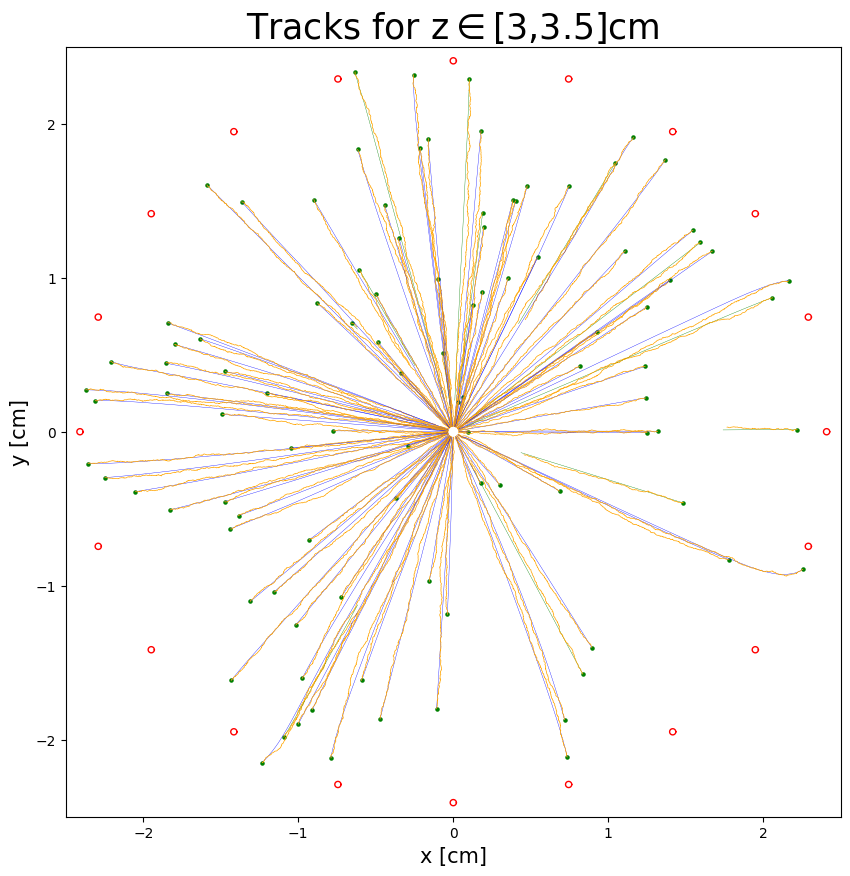

In [98]:
radius_of_trouble = 200e-4
pangle = np.linspace(0,2*np.pi, 100)
cart_points = cylinterp.Tools.to_cartesian(init_points)

plt.figure(figsize = (10,10))
cath_pos = rtpc.cathode_position(3.25)[0]

for i in range(100):
    if status[i]==0:
        c = 'blue'
    elif status[i]==1:
        c = 'red'
    elif status[i]==2:
        c = 'black'
    else:
        c = 'green'
    buffer_cut = rtracks[i]!=0
    buffer_cut_cpp = cpp_r_tracks[i]!=0
    plt.plot(rtracks[i][buffer_cut]*np.cos(thtracks[i][buffer_cut]),
             rtracks[i][buffer_cut]*np.sin(thtracks[i][buffer_cut]), color = c, linewidth = 0.25)
    plt.plot(cpp_r_tracks[i][buffer_cut_cpp]*np.cos(cpp_th_tracks[i][buffer_cut_cpp]),
             cpp_r_tracks[i][buffer_cut_cpp]*np.sin(cpp_th_tracks[i][buffer_cut_cpp]),
             color = 'orange', linewidth = 0.5)
    plt.scatter(cart_points[i][0], cart_points[i][1], s = 5, color = 'g')

for p in cath_pos:
    # plt.scatter(p[0], p[1], color = 'r')
    plt.plot(radius_of_trouble*np.cos(pangle)+p[0],
             radius_of_trouble*np.sin(pangle)+p[1], color = 'r', linewidth = 1)
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.xlabel('x [cm]', fontsize = 15)
plt.ylabel('y [cm]', fontsize = 15)
plt.title(r'Tracks for z$\in$[3,3.5]cm', fontsize = 25)
plt.show()

In [12]:
# dt, status, ztracks, rtracks, thtracks, init_points, end_points = rtpc.Drift(n_pts = 10000)

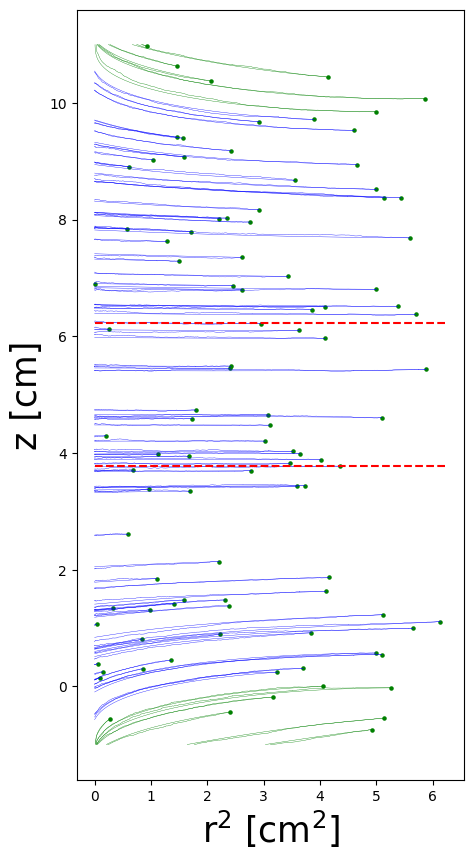

In [99]:
radius_of_trouble = 200e-4
pangle = np.linspace(0,2*np.pi, 100)
cart_points = cylinterp.Tools.to_cartesian(init_points)

plt.figure(figsize = (5,10))
cath_pos = rtpc.cathode_position(3.25)[0]

for i in range(100):
    if status[i]==0:
        c = 'blue'
    elif status[i]==1:
        c = 'red'
    elif status[i]==2:
        c = 'black'
    else:
        c = 'green'
    buffer_cut = rtracks[i]!=0
    buffer_cut_cpp = cpp_r_tracks[i]!=0
    
    plt.plot(rtracks[i][buffer_cut]**2,
             ztracks[i][buffer_cut], color = c, linewidth = 0.25)
    plt.plot(cpp_r_tracks[i][buffer_cut_cpp]**2,
             cpp_z_tracks[i][buffer_cut_cpp], color = c, linewidth = 0.25)
    plt.scatter((cart_points[i][0]**2+cart_points[i][1]**2),
                cart_points[i][2], s = 5, color = 'g')
    

central_z = 2.465952715464704
plt.hlines([5+central_z/2, 5-central_z/2], 0,2.5**2, linestyle = 'dashed', color = 'r')
plt.xlabel(r'r$^2$ [cm$^2$]', fontsize = 25)
plt.ylabel('z [cm]', fontsize = 25)
plt.show()

### Diffusion

In [16]:
from scipy.optimize import minimize

In [19]:
long_diff_data = [[99.72156936999053, 41.54136338837807],
    [198.13238301726582, 28.426767441550993],
    [296.857894026786, 27.158321246556937],
    [397.4051978315807, 26.541562986520404],
    [495.208199720076, 26.58447658713783],
    [745.7327207057419, 25.99067211347827],
    [793.0175110974862, 24.87990845098531],
    [896.5245257394428, 26.700243509733752]]
long_diff_data = np.array(long_diff_data).T

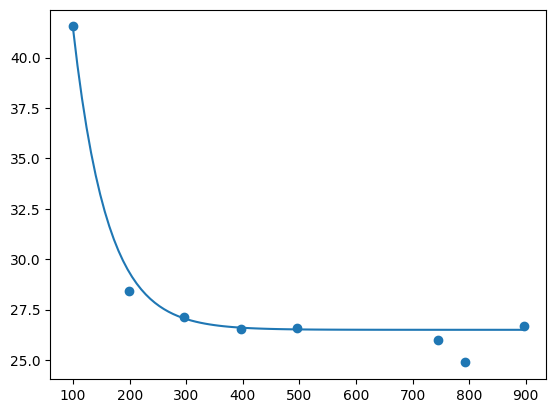

In [44]:
egrid = np.linspace(long_diff_data[0][0], long_diff_data[0][-1], 100)
plt.scatter(long_diff_data[0], long_diff_data[1])
plt.plot(egrid, 26.5+15*np.exp(-(egrid-egrid[0])/60))

In [47]:
def chi2(f, x, y):
    model = f[0]+f[1]*np.exp(-(x-x[0])/f[2])
    return np.sum((model-y)**2/model)

In [7]:
res = minimize(chi2, x0 = [26.5, 15, 60], args = (long_diff_data[0], long_diff_data[1]))
res

NameError: name 'minimize' is not defined

In [58]:
np.random.uniform(size=(100,3))*np.linalg.norm(np.random.uniform(size=(100,3)), axis = 1)

ValueError: operands could not be broadcast together with shapes (100,3) (100,) 

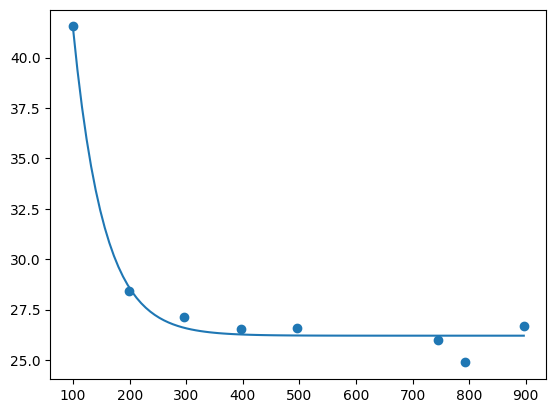

In [50]:
plt.scatter(long_diff_data[0], long_diff_data[1])
plt.plot(egrid, res.x[0]+res.x[1]*np.exp(-(egrid-egrid[0])/res.x[2]))

In [73]:
v = np.random.uniform(size = (100,3))
w = np.array([np.zeros(len(v)), np.ones(len(v)), -v.T[1]/v.T[2]]).T

v = v/np.linalg.norm(v, axis=1).reshape(100,1)
w = w/np.linalg.norm(w, axis=1).reshape(100,1)

In [74]:
z = np.cross(v, w)

In [15]:
dt, status, ztracks, rtracks, thtracks, init_points, end_points = rtpc.Drift(n_pts = 10,
                                                                             r=np.tile([5,2,0.5],(10,1)),
                                                                             cath_thresh=300e-4, diffusion=True)

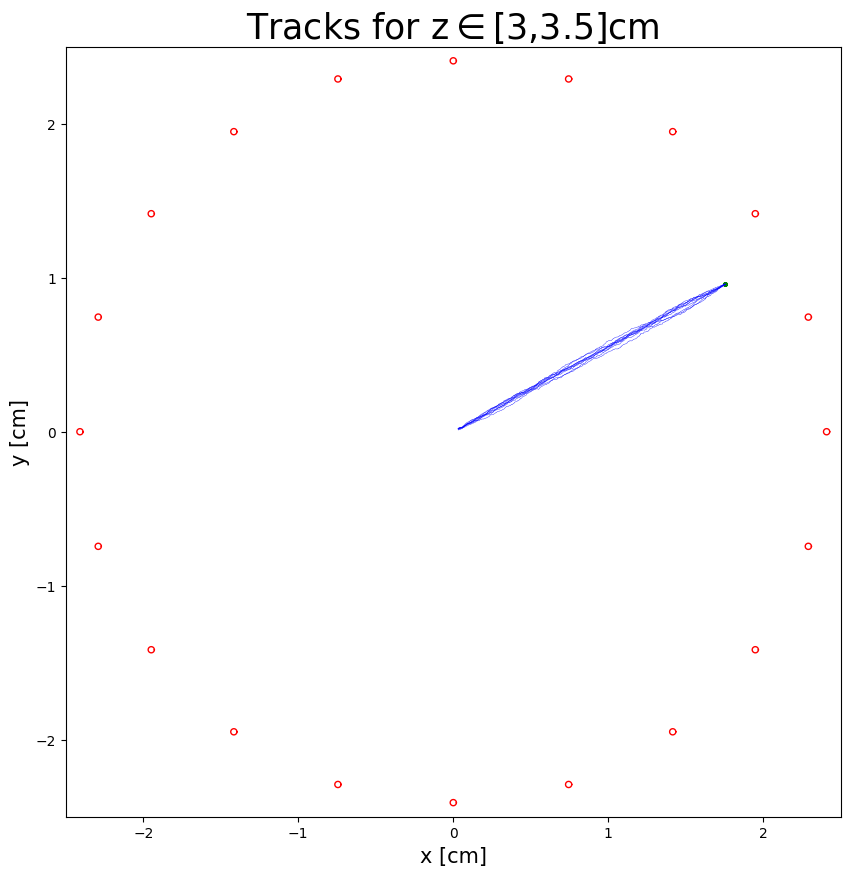

In [8]:
radius_of_trouble = 200e-4
pangle = np.linspace(0,2*np.pi, 100)
cart_points = cylinterp.Tools.to_cartesian(init_points)

plt.figure(figsize = (10,10))
cath_pos = rtpc.cathode_position(3.25)[0]

for i in range(10):
    if status[i]==0:
        c = 'blue'
    elif status[i]==1:
        c = 'red'
    elif status[i]==2:
        c = 'black'
    else:
        c = 'green'
    buffer_cut = rtracks[i]!=0
    plt.plot(rtracks[i][buffer_cut]*np.cos(thtracks[i][buffer_cut]),
             rtracks[i][buffer_cut]*np.sin(thtracks[i][buffer_cut]), color = c, linewidth = 0.25)
    plt.scatter(cart_points[i][0], cart_points[i][1], s = 5, color = 'g')

for p in cath_pos:
    # plt.scatter(p[0], p[1], color = 'r')
    plt.plot(radius_of_trouble*np.cos(pangle)+p[0],
             radius_of_trouble*np.sin(pangle)+p[1], color = 'r', linewidth = 1)
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.xlabel('x [cm]', fontsize = 15)
plt.ylabel('y [cm]', fontsize = 15)
plt.title(r'Tracks for z$\in$[3,3.5]cm', fontsize = 25)
plt.show()

In [36]:
dt, status, ztracks, rtracks, thtracks, init_points, end_points = rtpc.Drift(n_pts = 10,
                                                                            r = np.tile([6,2.2,0.5], (10,1)),
                                                                            diffusion=True)

In [17]:
import time
t0 = time.time()
dt, status, init_points, end_points = rtpc.Drift(n_pts = 10,
                                                r = np.tile([9.8,2.2,0.5], (10,1)),
                                                diffusion=True,
                                                tracking=False)
print(time.time()-t0)

0.6497657299041748


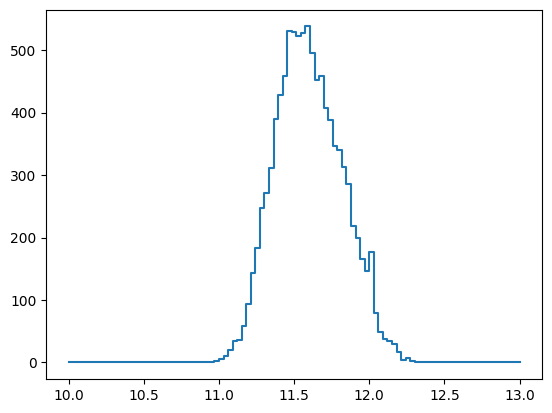

In [19]:
from multihist import Hist1d
Hist1d(dt, bins = np.linspace(10,13,100)).plot()

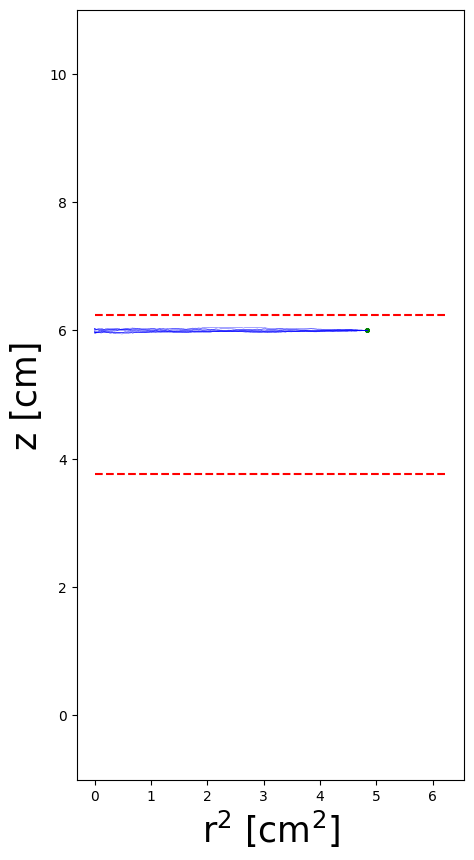

In [37]:
radius_of_trouble = 200e-4
pangle = np.linspace(0,2*np.pi, 100)
cart_points = cylinterp.Tools.to_cartesian(init_points)

plt.figure(figsize = (5,10))
cath_pos = rtpc.cathode_position(3.25)[0]

for i in range(10):
    if status[i]==0:
        c = 'blue'
    elif status[i]==1:
        c = 'red'
    elif status[i]==2:
        c = 'black'
    else:
        c = 'red'
    buffer_cut = rtracks[i]!=0
    
    plt.plot(rtracks[i][buffer_cut]**2,
             ztracks[i][buffer_cut], color = c, linewidth = 0.25)
    plt.scatter((cart_points[i][0]**2+cart_points[i][1]**2),
                cart_points[i][2], s = 5, color = 'g')
    

central_z = 2.465952715464704
plt.hlines([5+central_z/2, 5-central_z/2], 0,2.5**2, linestyle = 'dashed', color = 'r')
plt.xlabel(r'r$^2$ [cm$^2$]', fontsize = 25)
plt.ylabel('z [cm]', fontsize = 25)
plt.ylim(-1,11)
plt.show()

In [25]:
@njit
def blah(x,y):
    return x+y

In [26]:
@njit
def blah2(x,y):
    return blah(x,y)**2

In [27]:
blah2(1,2)

9